In [4]:
import numpy as np
import random

# DFS algorithm to check path

In [8]:
def check_path(env, i, j, vis, path, S, x, y):
    vis[i][j] = 1
    if S == 0 and i == x-1 and j == y-1:
        path = 1
        return path
    else:
        if path != 1 and i!=x-1 and env[i+1][j] == 1 and vis[i+1][j] == 0:
            path = check_path(env, i+1, j, vis, path, G, x, y)
        if path != 1 and j != y-1 and env[i][j+1] == 1 and vis[i][j+1] == 0:
            path = check_path(env, i, j+1, vis, path, G, x, y)
        if path != 1 and i!=0 and env[i-1][j] == 1 and vis[i-1][j] == 0:
            path = check_path(env, i-1, j, vis, path, G, x, y)
        if path != 1 and j != 0 and env[i][j-1] == 1 and vis[i][j-1] == 0:
            path = check_path(env, i, j-1, vis, path, G, x, y)
        return path

# Maze Environment

In [72]:
def create_env(x, y):
    m = True
    while(m):
        env = np.zeros((x,y), dtype = int)
        vis = np.zeros((x,y), dtype = int)
        # random values for cell
        for i in range(x):
            for j in range(y):
                env[i][j] = np.random.choice(2, 1, p = [0.28,0.72])
        env[0,0], env[x-1,y-1] = 1, 1
        #number of blocked cells
        k = 0
        for i in range(x):
            for j in range(y):
                if env[i][j] == 0:
                    k += 1

        path = check_path(env, 0, 0, vis, 0, 0, x, y)
        #if blocked cells is less than 50% and a path exists
        if (k/100 < 0.5) and  path == 1:
            m = False
            with open("test.txt", "ab") as f:
                f.write(b"\n")
                np.savetxt(f, env, fmt = '%1d')
            return env

# Generating 100 mazes

In [13]:
n = 0
maze = []
while n<100:
    env = create_env(51, 51)
    maze.append(list([env]))
    n+=1

In [6]:
import math 
import random
from npy_append_array import NpyAppendArray
from collections import deque

# Ghosts

# Ghosts Spawn

In [15]:
spwL = []

for i in range(100): 
    spwG = np.zeros((51,51), dtype = int) #where ghost can spawn, sent as the visited matrix
    path = check_path(maze[i][0], 0, 0, spwG, 0, 1, 51, 51)# 1 as S value indicates a position out of the maze for spawning
    spwL.append(list([spwG]))

In [9]:
def ghost_spw(spwG, n, posG, m):# for generating random start position of the ghosts
    for i in range(n):
        randRow = 0
        randCol = 0
        while ((randRow == 0 and randCol == 0) or (randRow == m-1 and randCol == m-1) or spwG[randRow][randCol] == 0):
            randRow = random.randint(0, m-1)
            randCol = random.randint(0, m-1)
        posG.append((randRow, randCol))
    return posG # a list of tuples conatining random ghost positions

In [10]:
def move_ghosts(posG, env, size):
    for i in range(len(posG)):
        x = posG[i][0]
        y = posG[i][1]
        movedG = False
        while not(movedG):
            move = np.random.randint(4, size = 1)[0] #random direction for the ghost to move
            if move == 0 and x != 0:
                    movedG = True
                    if env[x-1][y] == 1:
                        x -= 1 #moves up
                    else:
                        mv_into_wall = np.random.choice(2, 1, p = [0.5, 0.5])
                        if mv_into_wall == 1:
                            x -= 1 #into the up wall
            elif move == 1 and y != size-1:
                    movedG = True
                    if env[x][y+1] == 1:
                        y += 1  #moves right
                    else:
                        mv_into_wall = np.random.choice(2, 1, p = [0.5, 0.5])
                        if mv_into_wall == 1:
                            y += 1 #into the right wall
            elif move == 2 and x != size-1:
                    movedG = True
                    if env[x+1][y] == 1:
                        x += 1  #moves down
                    else:
                        mv_into_wall = np.random.choice(2, 1, p = [0.5, 0.5])
                        if mv_into_wall == 1:
                            x += 1
            elif move == 3 and y != 0:
                    movedG = True
                    if env[x][y-1] == 1:
                        y -= 1  #moves left
                    else:
                        mv_into_wall = np.random.choice(2, 1, p = [0.5, 0.5])
                        if mv_into_wall == 1:
                            y -= 1
        posG[i] = tuple([x, y]) #updates the ghost position
    return posG   

# Agent 1 Game

In [11]:
def BFS(env, vis, size, start):
    q = [[[start[0], start[1]]]] # list as a queue, adding start positon
    path = list()
    vis[start[0],start[1]] = 1 #visited matrix
    #q.append(list([0,0]))
    #print(q)
    while len(q) != 0:
        path = q.pop(0) #popping the first item from queue
        node = path[-1] #for generating the path
        i = node[0]
        j = node[1]
        if i == size-1 and j == size-1: #return if at finish
            return path
        if i!= size-1 and env[i+1][j] == 1 and vis[i+1][j] == 0: #add bottom cell
            new_path = list(path)
            #print("new_path1 " , new_path)
            new_path.append([i+1,j])
            #print("new_path2 " , new_path)
            #print("path " , path)
            q.append(new_path)
            #print("q" , q)
            vis[i+1][j] = 1
        if j != size-1 and env[i][j+1] == 1 and vis[i][j+1] == 0: #add right cell
            new_path = list(path)
            #print("new_path1 " , new_path)
            new_path.append([i,j+1])
            #print("new_path2 " , new_path)
            q.append(new_path)
            vis[i][j+1] = 1
        if i != 0 and env[i-1][j] == 1 and vis[i-1][j] == 0: #add top cell
            new_path = path
            new_path.append([i-1,j])
            q.append(new_path)
            vis[i-1][j] = 1
        if j != 0 and env[i][j-1] == 1 and vis[i][j-1] == 0: # add left cell
            new_path = path
            new_path.append([i,j-1])
            q.append(new_path)
            vis[i][j-1] = 1

In [183]:

for n in range(151): #number of ghosts
    print(n)
    success = 0
    for l in range(100): # number of mazes
        vis = np.zeros(shape=(51,51), dtype = int)
        path = BFS(maze[l][0], vis, 51, (0,0))
        currA = path[0]      
        j=0
        while j<10: # number of tries for each maze
            posG = []
            posG = ghost_spw(spwL[l][0], n, posG, 51)
            m=True
            for i in range(len(path)-1):
                currA = path[i+1] #agent moves
                posG = move_ghosts(posG, maze[l][0], 51)#ghosts move
                if tuple(currA) in posG: 
                    m = False
                    break # agent dies
            if m == True:
                success += 1 #if agent lives
            j+=1
    succG.append(success/500) #survival rate


<function matplotlib.pyplot.show(*args, **kw)>

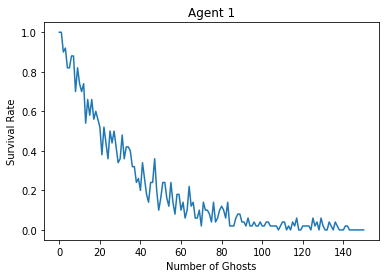

In [175]:
# just for maze 1
import matplotlib.pyplot as plt

x = [i for i in range(151)]

plt.plot(x, succG)
plt.xlabel('Number of Ghosts')
plt.ylabel('Survival Rate')
plt.title('Agent 1')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

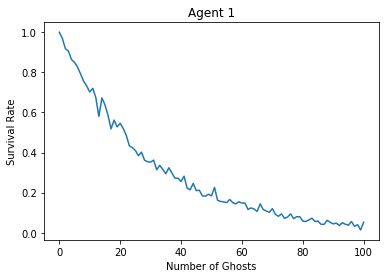

In [185]:
#ran again for all mazes
x = [i for i in range(101)]

plt.plot(x, succG)
plt.xlabel('Number of Ghosts')
plt.ylabel('Survival Rate')
plt.title('Agent 1')
plt.show

# Agent 2 Game

In [61]:
def BFS_w_ghosts(env, posG, size, currA):#changing environment to have ghosts as blocked cells
    env_copy  = env.copy()
    vis = np.zeros((size, size), dtype = int)
    for i in posG:
        env_copy[i[0]][i[1]] = 0
    path = BFS(env_copy, vis, 51, currA) #calling BFS
    return path

In [39]:
def move_away(envC, posG, currA): #Moving away
    min = 1000
    for i in posG:
        dis = math.sqrt((currA[1]-i[1])*(currA[1]-i[1])+(currA[0]-i[0])*(currA[0]-i[0]))#Euclidean Distance
        if dis < min:
            min = dis
            minG = i
    if (minG[0] - currA[0]) == 0:#if slope is infinity(avoiding dividing by zero)
        slope = "inf"
    else:
        slope = (minG[1] - currA[1])/(minG[0] - currA[0])
        
    if slope == "inf" and minG[1] > 0 and currA[0] < len(envC)-1: #ghost is in North
        return (currA[0]+1, currA[1]) 
    elif slope = "inf" and minG[1] < 0 and currA[0] > 0: #ghost is South
        return (currA[0]-1, currA[1])
    elif slope == 0 and minG[0] > 0 and currA[1] > 0: #ghost is East
        return (currA[0], currA[1]-1)
    elif minG[0] < 0 and currA[1] < 0 and currA[1] < len(envC)-1: #ghost is west
        return (currA[0], currA[1]+1)
    if slope < 1 and slope > -1 and currA[1] > 0 and env[currA[0],currA[1]-1] == 1: #ghost is towards right
        return (currA[0], currA[1]-1)
    if slope < 1 and slope < -1 and currA[0] > 0 and env[currA[0]-1,currA[1]] == 1: #ghost is towards downwards
        return (currA[0]-1, currA[1])
    if slope > 1 and slope < -1 and currA[1] < len(envC)-1 and env[currA[0],currA[1]+1] == 1: #ghost is upwards
        return (currA[0], currA[1]+1)
    if slope > 1 and slope > -1 and currA[0] < len(envC)-1 and env[currA[0]+1,currA[1]] == 1: #ghost is towards left
        return (currA[0]+1, currA[1])
    return currA

# Agents 4 using Agent 2 BFS

# Agent 4 uses same Agent 2 with a square of size 3 being the ghost visibililty

# This was the Agent 2 actual code that was later changed for running Agent 4

In [63]:
agent4BFS = []
for l in range(100): #for 100 ghosts
    success = 0
    print(l)
    for k in range(100): #100 mazes
        currA = [0,0]
        vis = np.zeros(shape=(51, 51), dtype = int)
        j=0
        while j<10: #trial runs
            posG = []
            posG = ghost_spw(spwL[k][0], l, posG, 51)
            path = BFS_w_ghosts(maze[k][0], posG, 51, currA) #initializing path
            currA = path[0] #agent starting
            m=True#variable to check if agent is alive
            i=0
            while currA != [50, 50]:
                #print(path, i)
                currA = path[i+1] #agent moves
                if tuple(path[i+1]) in posG: #if the next path cell has a ghost, recalculate the path
                    i=-1
                    path = BFS_w_ghosts(maze[k][0], posG, 51, currA)
                if path == None: #if no path, move away and recalculate the path from there
                    i=-1
                    currA = move_away(maze[k][0], posG, currA)
                    path = BFS_w_ghosts(maze[k][0], posG, 51, currA)
                #old_posG = posG.copy()
                posG = move_ghosts(posG, maze[k][0], 51) #ghosts moving one step
                if tuple(currA) in posG: #if the agent and ghost are in the same cell, agent dies
                    m = False
                    break
            i+=1

        if m == True: if #if agent is alive , increase survival
            success += 1
        j+=1
    agent4BFS.append(success/500)

0


KeyboardInterrupt: 

# Agent 2 

In [ ]:
succGA2 = []
for l in range(100): #for 100 ghosts
    success = 0
    print(l)
    for k in range(100): #100 mazes
        currA = [0,0]
        vis = np.zeros(shape=(51, 51), dtype = int)
        j=0
        while j<10: #trial runs
            posG = []
            posG = ghost_spw(spwL[k][0], l, posG, 51)
            path = BFS_w_ghosts(maze[k][0], posG, 51, currA) #initializing path
            currA = path[0] #agent starting
            m=True#variable to check if agent is alive
            i=0
            while currA != [50, 50]:
                #print(path, i)
                currA = path[i+1] #agent moves
                if tuple(path[i+1]) in posG: #if the next path cell has a ghost, recalculate the path
                    i=-1
                    path = BFS_w_ghosts(maze[k][0], posG, 51, currA)
                if path == None: #if no path, move away and recalculate the path from there
                    i=-1
                    currA = move_away(maze[k][0], posG, currA)
                    path = BFS_w_ghosts(maze[k][0], posG, 51, currA)
                #old_posG = posG.copy()
                posG = move_ghosts(posG, maze[k][0], 51) #ghosts moving one step
                if tuple(currA) in posG: #if the agent and ghost are in the same cell, agent dies
                    m = False
                    break
            i+=1

        if m == True: if #if agent is alive , increase survival
            success += 1
        j+=1
    succGA2.append(success/500)

<function matplotlib.pyplot.show(*args, **kw)>

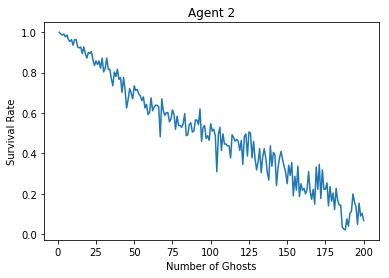

In [71]:
import matplotlib.pyplot as plt
x = [i for i in range(1,201)]

plt.plot(x, succGA2) #Plotting for agent 2
plt.xlabel('Number of Ghosts')
plt.ylabel('Survival Rate')
plt.title('Agent 2')
plt.show

# Agent 3 Begins Here

In [28]:
from queue import PriorityQueue

In [29]:
def hscore(cell1, cell2): 
    return abs(cell1[0]-cell2[0]) + abs(cell1[1]-cell2[1]) #manhattan distance

# A* Algorithm

In [30]:
def astar(env, currA, size):
    gscore = {}
    fscore = {}
    childC = None
    #initializing gscore and fscore for each cells as infinity
    for i in range(size):
        for j in range(size):
            gscore[(i,j)] = float('inf')
            fscore[(i,j)] = float('inf')
    #print(gscore, fscore)      
    #initializin for the start cell
    gscore[(currA[0], currA[1])] = 0 
    fscore[(currA[0], currA[1])] = hscore(currA, [size-1, size-1])
    
    pq = PriorityQueue()
    pq.put((hscore(currA, (size-1,size-1)), hscore(currA, (size-1,size-1)), currA)) #putting first item in queue
    pathA = {} #path is a dictionary of all the cell moves agents takes (eg. {cell1[0], cell1[1]:cell2[0], cell2[1]})
    while not pq.empty():
        currC = tuple(pq.get()[2]) #getting the current cell
        if currC == (size-1, size-1): #if at finish, end
            break
        for i in range(4): #for all 4 directions
            if i == 0 and currC[1] < size-1 and env[currC[0],currC[1]+1] == 1:
                childC = tuple([currC[0],currC[1]+1])
                tempgscore = gscore[currC]+1
                tempfscore = tempgscore + hscore(childC, (size-1, size-1))
                #updating gscore and fscore if they are lesser than previous ones
                if tempfscore < fscore[childC]:
                    gscore[childC] = tempgscore
                    fscore[childC] = tempfscore
                    pq.put((tempfscore, hscore(childC,(size-1, size-1)), childC)) #and adding them to queue
                    pathA[childC] = currC #add cell move to dict
            if i == 1 and  currC[0] < size-1 and env[currC[0]+1,currC[1]] == 1: #moving down
                childC = (currC[0]+1,currC[1])
                tempgscore = gscore[currC]+1
                tempfscore = tempgscore + hscore(childC, (size-1, size-1))
            
                if tempfscore < fscore[childC]:
                    gscore[childC] = tempgscore
                    fscore[childC] = tempfscore
                    pq.put((tempfscore, hscore(childC,(size-1, size-1)), childC))
                    pathA[childC] = currC
            if i == 2 and currC[1] > 0 and env[currC[0],currC[1]-1] == 1: #moving left
                childC = (currC[0],currC[1]-1)
                tempgscore = gscore[currC]+1
                tempfscore = tempgscore + hscore(childC, (size-1, size-1))
            
                if tempfscore < fscore[childC]:
                    gscore[childC] = tempgscore
                    fscore[childC] = tempfscore
                    pq.put((tempfscore, hscore(childC,(size-1, size-1)), childC))
                    pathA[childC] = currC
            if i == 3  and currC[0] > 0 and env[currC[0]-1,currC[1]] == 1: #moving right
                childC = (currC[0]-1,currC[1])
                tempgscore = gscore[currC]+1
                tempfscore = tempgscore + hscore(childC, (size-1, size-1))
            
                if tempfscore < fscore[childC]:
                    gscore[childC] = tempgscore
                    fscore[childC] = tempfscore
                    pq.put((tempfscore, hscore(childC,(size-1, size-1)), childC))
                    pathA[childC] = currC
            

    pathF = {} 
    #print("currA", currA)
    cell = (size-1, size-1)
    #print("pathA", pathA)
    if pathA.get(cell) == None:
        return None
    #traversing the path dictionary in reverse from the finish to find actual path
    while cell != tuple(currA):
        pathF[pathA[cell]] = cell
        cell = pathA[cell]
    #print("pathF", pathF)
    return pathF


In [31]:
def astar_w_ghosts(env, currA, posG): #putting zeros where there is a ghost to find a path avoiding them
    env_copy  = env.copy()
    
    for i in range(51):
        for j in range(51):
            if env[i][j] == 0
                
        env_copy[i[0]][i[1]] = 0
    path = astar(env_copy, currA, len(env))
    return path

In [51]:
def agent3_game_on(env, posG):
    currC = (0,0)
    size = len(env)
    success = 0
    j=0
    childC = None
    env_copy = env.copy()
    for i in posG:
        env_copy[i[0]][i[1]] = 0
    while j<10:
        m = True
        while currC != (size-1, size-1):
            #print(currC)
            dis = 10000
            minD = 10000
            maxS = 0
            srate = 0
            posG_copy = posG.copy()
            for i in range(5): # for loop for all 4 directions and staying in place
                if i == 0 and currC[1] < size-1 and env[currC[0],currC[1]+1] == 1:
                    nextC = (currC[0],currC[1]+1) #moving right
                    srate, dis = agent2WAstar(env, nextC, posG_copy) #sends back survival rate and distance to finish
                if i == 1 and  currC[0] < size-1 and env[currC[0]+1,currC[1]] == 1:
                    nextC = (currC[0]+1,currC[1])#moving down
                    srate, dis = agent2WAstar(env, nextC, posG_copy)
                if i == 2 and currC[1] > 0 and env[currC[0],currC[1]-1] == 1:
                    nextC = (currC[0],currC[1]-1) #moving left
                    srate, dis = agent2WAstar(env, nextC, posG_copy)
                if i == 3  and currC[0] > 0 and env[currC[0]-1,currC[1]] == 1:
                    nextC = (currC[0]-1,currC[1]) #moving up
                    srate, dis = agent2WAstar(env, nextC, posG_copy)
                if i == 4:
                    nextC = (currC) #staying in place
                    srate, dis = agent2WAstar(env, nextC, posG_copy)
                #print(i, srate, max)
                if srate > maxS: #max survival rate
                    maxS = srate
                    childC = nextC
                if dis < minD and dis != 0 and srate == maxS: #min distance only when there is a tie
                    minD = dis
                    childC = nextC
            if childC != None:
                currC = childC
            elif srate == 0:
                currC = move_away(env_copy, posG, currC) #if no moves, then move away
                
            posG = move_ghosts(posG, env, 51)
            
            if currC in posG: 
                m = False #agent dying
                break
        if m==True:
            success += 1 
        j += 1
    return success/10 #average of 10 tries

# Agent 2 using A*

In [52]:
def agent2WAstar(env, currA, posG):
    path = {}
    size = len(env)
    if currA == (size-1, size-1):
        return 1 ,0.01
    path = astar_w_ghosts(env, currA, posG) #initialise path
    #if path == None:
        #return 0 #, 0
    #print("agent2WAstar", path)
    env_copy = env.copy()
    for i in posG:
        env_copy[i[0]][i[1]] = 0
    success = 0
    dis = 0
    j=0
    while j<10:
        m=True
        while currA != (size-1, size-1):
            if path != None: 
                currA = path.get(currA) #Agent smoves
            else: #if no path, move away and recalculate the path 
                currA = move_away(env_copy, posG, currA) 
                path = astar_w_ghosts(env, currA, posG)
                #dis = 0
                #m = False
                #break
            posG = move_ghosts(posG, env, size) #ghosts take one step
            if currA in posG: #agent dying
                dis = 0
                m = False
                break
            if path != None and path.get(currA) in posG: #checking if next path cell has a ghost and if it does replan
                path = astar_w_ghosts(env, currA, posG)
            if path == None: #if again no path, move away and replan
                currA = move_away(env_copy, posG, currA)
                path = astar_w_ghosts(env, currA, posG)
            #old_posG = posG.copy()
            dis += 1 #for calculating distance
        if m == True:
            success += 1
        j+=1
    return success/10 , dis/10 #average

# Agent 2 runs

In [44]:
succGA2A = [] #agent2 A*
for l in range(200):
    success = 0
    print(l)
    for k in range(50):
        posG = []
        posG = ghost_spw(spwL[k][0], l, posG, 51)
        success += agent2WAstar(maze[k][0], (0,0), posG)
    succGA2A.append(success/50)
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


# below are two seperate runs for Agent 2

<function matplotlib.pyplot.show(*args, **kw)>

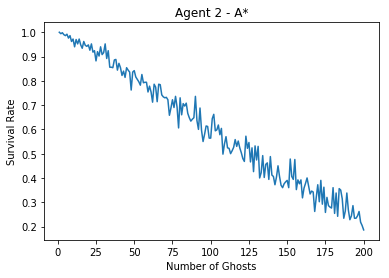

In [40]:
x = [i for i in range(1,201)]

plt.plot(x, succGA2A)
plt.xlabel('Number of Ghosts')
plt.ylabel('Survival Rate')
plt.title('Agent 2 - A*')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

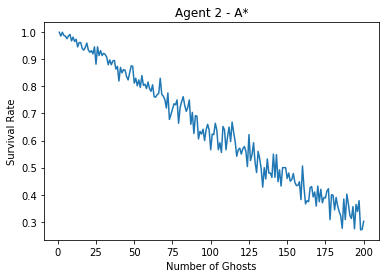

In [45]:
x = [i for i in range(1,201)]

plt.plot(x, succGA2A)
plt.xlabel('Number of Ghosts')
plt.ylabel('Survival Rate')
plt.title('Agent 2 - A*')
plt.show

# Agent 3 runs (stopped at 70 ghosts as going to zero)

In [53]:
for l in range(17, 200):
    success = 0
    print(l)
    for k in range(50):
        posG = []
        posG = ghost_spw(spwL[k][0], l, posG, 51)
        success += agent3_game_on(maze[k][0], posG)
    succGA3.append(success/50)

17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71


KeyboardInterrupt: 

<function matplotlib.pyplot.show(*args, **kw)>

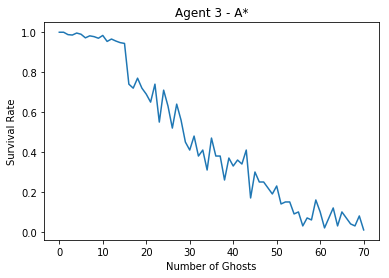

In [55]:
x = [i for i in range(0,71)]
succGA3.append(0.01)
plt.plot(x, succGA3)
plt.xlabel('Number of Ghosts')
plt.ylabel('Survival Rate')
plt.title('Agent 3 - A*')
plt.show